In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Cantor

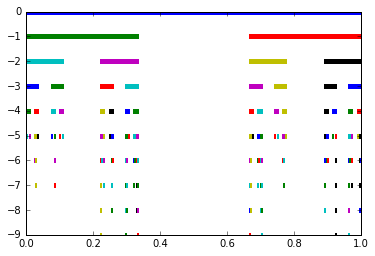

In [2]:
def cantor_normal(a, b):
    return [a, 2*a/3+b/3, a/3+2*b/3, b]

def otro_cantor(a, b):
    return [a, 3*a/4+b/4, a/4+3*b/4, b]

cantor = cantor_normal
#plt.figure(figsize=(20,20))

def itera(a, b, h, n):
    if n > 0:
        c = cantor(a, b)
        itera(c[0], c[1], h, n-1)
        itera(c[2], c[3], h, n-1)
    else:
        plt.plot([a, b], [h, h], linewidth=5, solid_capstyle='butt', aa=False)

for h in range(10):
    itera(0, 1, -h, h)

# Koch

In [3]:
def sig(a, b, p=1/2):
    """ Devuelve el punto a*(1-p)+b*p, a y b son puntos. """
    return a*(1-p)+ b*p

def rot(a, ang=90):
    "Rota un vector a (con origen cero) ang grados."
    theta = np.radians(ang)
    c, s = np.cos(theta), np.sin(theta)
    R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
    return np.array((R@a.T)[0])[0]

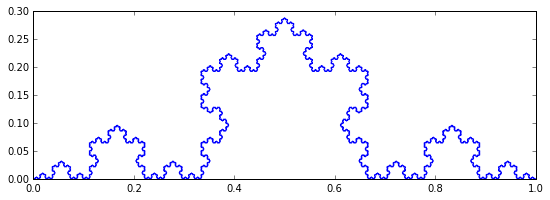

In [4]:
def _koch(a, b, n):
    c = (b-a)/3 + a  # vector a un tercio de dist de a a b   sig(a, b, 1/3)
    e = (b-a)*2/3 + a  # a dos tercios
    d = rot(e - c, 60) + c  # ce rotado 60º
    if n > 0:
        return np.append(np.array([]), [_koch(a, c, n-1), _koch(c, d, n-1), _koch(d, e, n-1), _koch(e, b, n-1)])
    else:
        return np.array([a])

plt.figure(figsize=(9,3))

def koch(a, b, n):
    k = _koch(a, b, n)
    x = np.append(k[::2], b[0])  # agrega b a la lista
    y = np.append(k[1::2], b[1])
    plt.plot(x, y)

koch(np.array((0, 0)), np.array((1, 0)), 6)

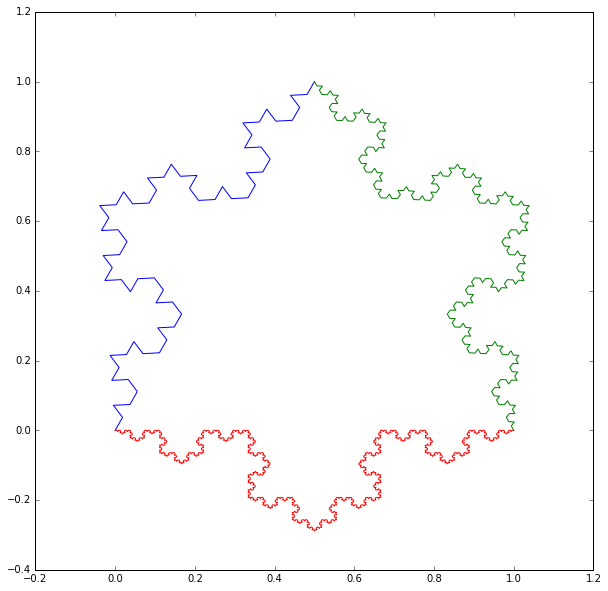

In [5]:
a=np.array((0,0))
b=np.array((.5,1))
c=np.array((1,0))

plt.figure(figsize=(10,10))

koch(a, b, 3)
koch(b, c, 4)
koch(c, a, 5)

# Sierpinski

(array([ 4080.,  1420.,  1036.,   820.,   788.,  1447.,  1064.,   874.,
          762.,   712.,   692.,   640.,   732.,   650.,   630.,   554.,
          540.,   549.,   540.,   512.,   486.,   491.,   556.,   520.,
          495.,   471.,   474.,  2365.,  1763.,  1388.,  1372.,   998.,
         1002.,   968.,   912.,  1068.,   990.,   965.,  1177.,  1401.,
          569.,   556.,   560.,   993.,   777.,   701.,   696.,   639.,
          574.,   586.,   597.,   531.,   580.,   573.,   550.,   561.,
          591.,   566.,   530.,   575.,   546.,   617.,   604.,   571.,
          573.,   560.,   615.,   500.,   587.,   537.,   584.,   597.,
          588.,   571.,   598.,   597.,   587.,   638.,   632.,   635.,
          663.,   698.,   706.,   696.,   675.,   779.,   799.,   814.,
         2817.,  1951.,  1730.,  1930.,  1583.,  1687.,  1714.,  1932.,
         2312.,  2668.,  3815.,  7085.]),
 array([ 0.0950625 ,  0.10386188,  0.11266125,  0.12146063,  0.13026   ,
         0.13905938, 

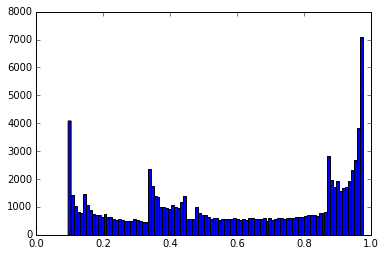

In [12]:
def generador_caótico(n, semilla=0.3, R=4, ajustar01=False):
    def logistica(x):
        return R*x*(1-x)
    for _ in range(1000):  # descarta los primeros
        semilla = logistica(semilla)
    x = [semilla]
    xmin, xmax = 1,0
    for _ in range(n - 1):
        nextx = logistica(x[-1])
        if ajustar01:
            if nextx>xmax:
                xmax = nextx
            if nextx<xmin:
                xmin = nextx
        x.append(nextx)
        x = np.array(x)
        if ajustar01:
            x = (x - xmin)/(xmax - xmin)
    return np.array(x)

plt.hist(generador_caótico(100000, R=3.9), bins=100)
#%time plt.hist(generador_caótico(10000000), bins=1000, range=(.7,.8))
#%time plt.hist(np.random.rand(10000000), bins=100)



[  6.12323400e-16  -8.66025404e+00   8.66025404e+00   3.06161700e-15
   0.00000000e+00] [ 10.  -5.  -5.  10.   0.] 3


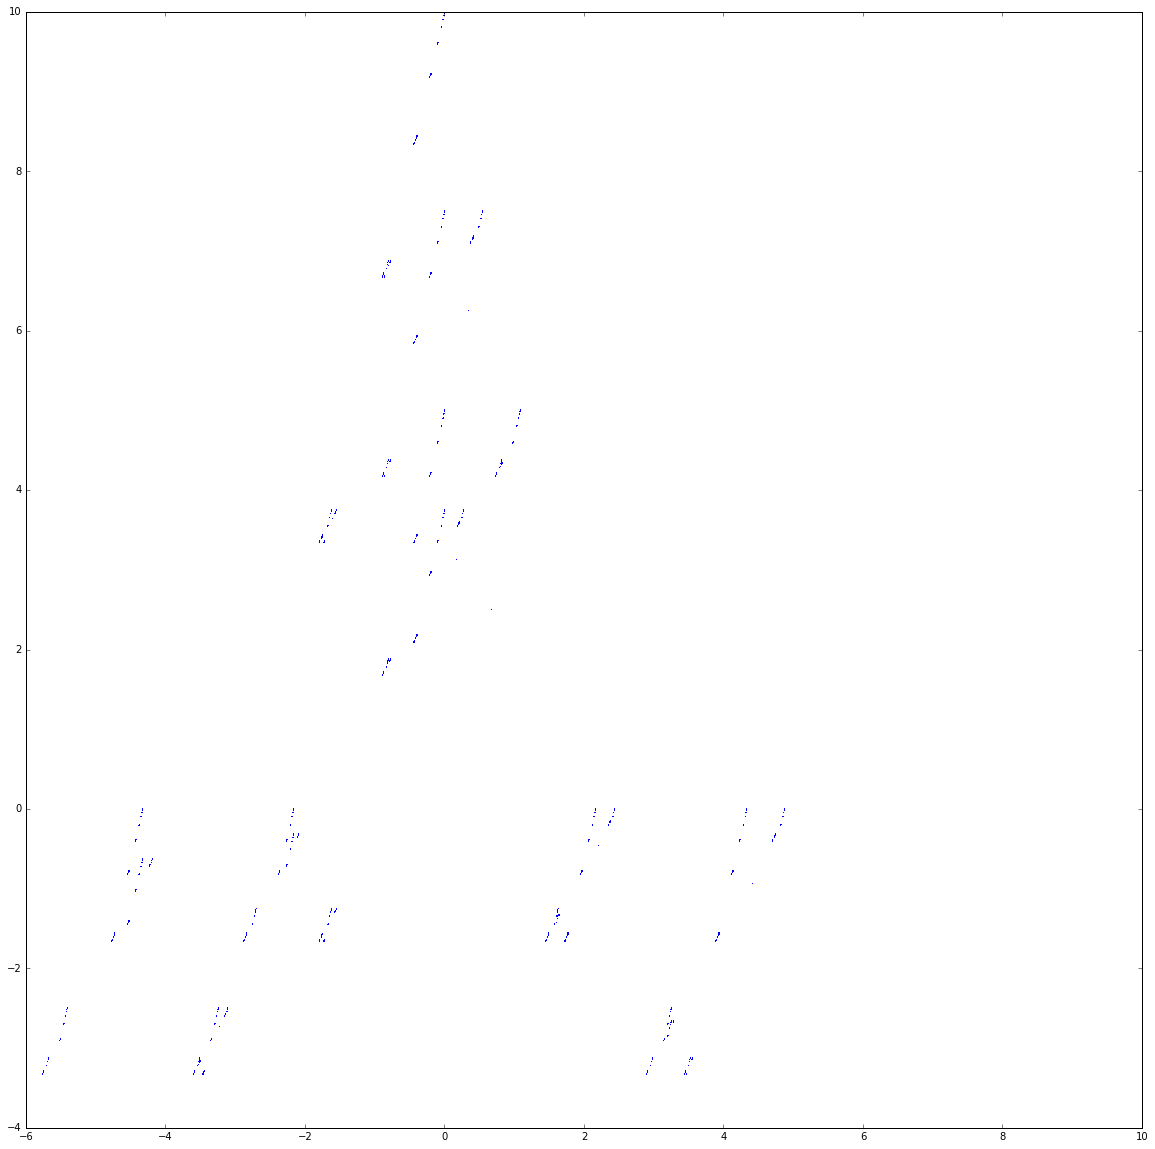

In [28]:
def juego_del_caos(nvertices, razon=0.5):
    ang = np.linspace(np.pi/2, 5*np.pi/2, nvertices+1) # vert equidistantes sobre circunferencia
    vx = 10 * np.cos(ang)  # polares a rectangulares
    vy = 10 * np.sin(ang)
    vx = np.append(vx, 0)
    vy = np.append(vy, 0)
    print(vx, vy, nvertices)
    x = [10]  # orbita
    y = [10]
    #R = np.random.randint(0, nvertices+2, 100000)  # vértices a tomar al azar
    #R = (np.random.randn(100000)+2)/5 * nvertices  # vértices a tomar al azar
    #R = np.repeat([0,1,2], 100000)   # [0,0,0,...,1,1,1,...,2,2,2,...]  No funciona!
    #R = [0,1,2] * 100000  # [0,1,2, 0,1,2, 0,1,2, ...] No funciona!
    R = generador_caótico(1000000, R=3.8) * (nvertices+2)
    for r in R:
        xy = np.array((x[-1], y[-1]))
        vr = np.array((vx[int(r)], vy[int(r)]))
        s = sig(xy, vr, razon)  # siguiente elem de la órbita
        x.append(s[0])
        y.append(s[1])
    plt.plot(x, y, ',')
    plt.show()

plt.figure(figsize=(20,20))
juego_del_caos(3)
#juego_del_caos(4, .7)
#juego_del_caos(4, .6)
#juego_del_caos(4, .5)

# Ramas

In [4]:
def _rama(b, n, esc1, esc2, ang1, ang2):
    for _ in range(n):
        nuevas = []
        lb = len(b)
        escala1 = esc1
        escala2 = esc2
        for i in range(int(lb/2), lb):
            r, s = b[int(i/2)], b[i]
            if esc1 == "aleatorio":
                escala1 = np.random.rand()
                escala2 = np.random.rand()
            z = rot((s - r)*escala1, ang1) + s
            w = rot((s - r)*escala2, ang2) + s
            nuevas.extend([z, w])
        b.extend(nuevas)
    return b

def rama(n, esc1=2/3, esc2="nada", ang1=15, ang2="nada"):
    if ang2 == "nada":
        ang2 = -ang1
    if esc2 == "nada":
        esc2 = esc1
    r = _rama([np.array([0,0]), np.array([0,1])], n, esc1, esc2, ang1, ang2)
    plt.plot([r[0][0], r[1][0]], [r[0][1], r[1][1]])
    for i in range(1, len(r)//2):
        plt.plot([r[i][0], r[2*i][0]], [r[i][1], r[2*i][1]])
        plt.plot([r[i][0], r[2*i+1][0]], [r[i][1], r[2*i+1][1]])
    plt.show()
    
rama(6, esc1=2/3, ang1=5, ang2=-2.5)
rama(10, esc1=2/3, ang1=90)
rama(6, ang1=90)
rama(6, ang1=90, ang2=-45)
rama(6, ang1=5, ang2=3)
rama(8, ang1=60, esc1=.45)  # long que si converge  esci<0.5
rama(6, ang1=30, esc1=-.45)
rama(7, ang1=25, esc1=1.1)
rama(6, esc1="aleatorio", ang1=5, ang2=-2.5)
rama(10, esc1="aleatorio", ang1=90)

NameError: name 'rot' is not defined

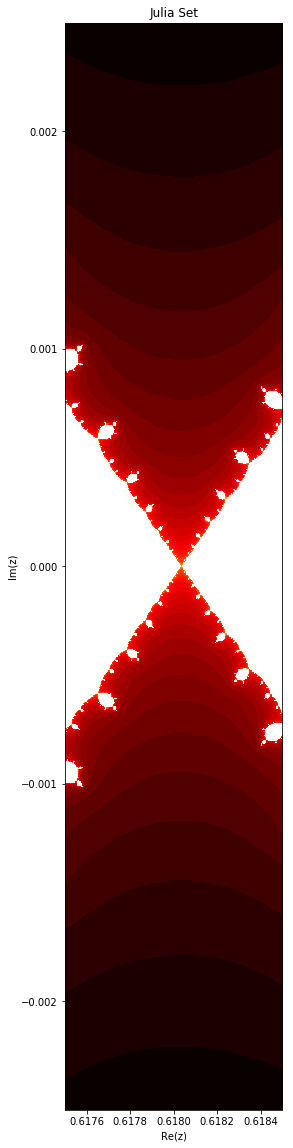

In [20]:
# MANDELBROT SET
import numpy as np
import pylab as pl
%matplotlib inline

# number of iterations
iterations = 100
 
# density of the grid
density = 1000


def mandelbrot():
    x_min, x_max = -1.5, 1.5
    y_min, y_max = -1.5, 1.5
    #x_min, x_max = -1.85, -1.7
    #y_min, y_max = -.1, .1
    
    #x, y = np.ogrid[x_min:x_max:density*1j,y_min:y_max:density*1j]
    x, y = np.linspace(x_min, x_max, density)[np.newaxis].T, np.linspace(y_min, y_max, density)
    c = x + 1j * y
    z = c.copy()
    m = np.zeros((density, density))

    for n in range(iterations):
        #print("%d %% completado..." % (100 * float(n)/iterations))
        indices = (abs(z) <= 10)
        z[indices] = z[indices]**2 + c[indices]
        m[indices] = n
 
    pl.figure(figsize=(20,20))

    pl.imshow(np.log(m.T), cmap=pl.cm.hot, extent=(x_min, x_max, y_min, y_max))
    pl.title('Mandelbrot Set')
    pl.xlabel('Re(z)')
    pl.ylabel('Im(z)')
    pl.show()


def julia(c):
    x_min, x_max = .6175, .6185
    y_min, y_max = -.0025,.0025
    
    #x, y = np.ogrid[x_min:x_max:density*1j, y_min:y_max:density*1j]
    x, y = np.linspace(x_min, x_max, density)[np.newaxis].T, np.linspace(y_min, y_max, density)
    
    z = x + 1j * y
    m = np.zeros((density, density))
    
    for n in range(iterations):
        indices = (abs(z) <= 10)
        z[indices] = z[indices]**2 + c
        m[indices] = n
 
    pl.figure(figsize=(20,20))

    pl.imshow(np.log(m.T), cmap=pl.cm.hot, extent=(x_min, x_max, y_min, y_max))
 
    pl.title('Julia Set')
    pl.xlabel('Re(z)')
    pl.ylabel('Im(z)')
    pl.show()
    
#for t in np.arange(.1,2, .1):
#    julia(t+t*1j)

#mandelbrot()
julia(-1)